In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to set a pixel on the canvas
def set_pixel(canvas, x, y, color="black"):
    canvas[y, x] = 255  # Mark the pixel on the canvas

# Define a function to draw a label (placeholder for visualization)
def set_label(x, y, label):
    print(f"Label at ({x}, {y}): {label}")

In [2]:
# Bresenham's Line Algorithm function
def bresenham_line(canvas, x0, y0, x1, y1):
    set_label(x0, y0, f"bresenhamLine({x0}, {y0}, {x1}, {y1})")

    dx = abs(x1 - x0)
    dy = abs(y1 - y0)

    # Handle vertical line
    if dx == 0:
        for y in range(min(y0, y1), max(y0, y1) + 1):
            set_pixel(canvas, x0, y)
        return

    # Handle horizontal line
    if dy == 0:
        for x in range(min(x0, x1), max(x0, x1) + 1):
            set_pixel(canvas, x, y0)
        return

    # Initialize decision variables
    dT = 2 * (dy - dx)
    dS = 2 * dy
    d = 2 * dy - dx

    x, y = x0, y0
    if dx >= dy:
        set_pixel(canvas, x, y)
        while x < x1:
            x += 1
            if d < 0:
                d += dS
            else:
                y += 1 if y1 > y0 else -1
                d += dT
            set_pixel(canvas, x, y)
    else:
        set_pixel(canvas, x, y)
        while y < y1:
            y += 1
            if d > 0:
                x += 1 if x1 > x0 else -1
                d -= 2 * dx
            d += dS
            set_pixel(canvas, x, y)

In [3]:
# Bresenham's Line Dashed Algorithm function
def bresenham_line_dashed(canvas, x0, y0, x1, y1):
    set_label(x0, y0, f"bresenhamLine({x0}, {y0}, {x1}, {y1})")

    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    step = 0

    # Handle vertical line
    if dx == 0:
        for y in range(min(y0, y1), max(y0, y1) + 1):
            if step % 3 == 0:
                set_pixel(canvas, x0, y)
            step += 1  # Increment step
        return

    # Handle horizontal line
    if dy == 0:
        for x in range(min(x0, x1), max(x0, x1) + 1):
            if step % 3 == 0:
                set_pixel(canvas, x, y0)
            step += 1  # Increment step
        return

    # Initialize decision variables
    dT = 2 * (dy - dx)
    dS = 2 * dy
    d = 2 * dy - dx

    x, y = x0, y0
    if dx >= dy:
        if step % 3 == 0:
            set_pixel(canvas, x, y)
        step += 1  # Increment step
        while x < x1:
            x += 1
            if d < 0:
                d += dS
            else:
                y += 1 if y1 > y0 else -1
                d += dT
            if step % 3 == 0:
                set_pixel(canvas, x, y)
            step += 1  # Increment step
    else:
        if step % 3 == 0:
            set_pixel(canvas, x, y)
        step += 1  # Increment step
        while y < y1:
            y += 1
            if d > 0:
                x += 1 if x1 > x0 else -1
                d -= 2 * dx
            d += dS
            if step % 3 == 0:
                set_pixel(canvas, x, y)
            step += 1  # Increment step


Label at (100, 400): bresenhamLine(100, 400, 300, 400)
Label at (100, 400): bresenhamLine(100, 400, 300, 500)
Label at (100, 300): bresenhamLine(100, 300, 300, 400)
Label at (400, 300): bresenhamLine(400, 300, 600, 300)
Label at (400, 300): bresenhamLine(400, 300, 400, 500)
Label at (600, 300): bresenhamLine(600, 300, 600, 500)
Label at (700, 500): bresenhamLine(700, 500, 900, 500)
Label at (700, 400): bresenhamLine(700, 400, 900, 400)
Label at (700, 300): bresenhamLine(700, 300, 900, 300)
Label at (700, 400): bresenhamLine(700, 400, 700, 500)
Label at (900, 400): bresenhamLine(900, 400, 900, 300)
Label at (1000, 500): bresenhamLine(1000, 500, 1200, 500)
Label at (1100, 300): bresenhamLine(1100, 300, 1100, 500)


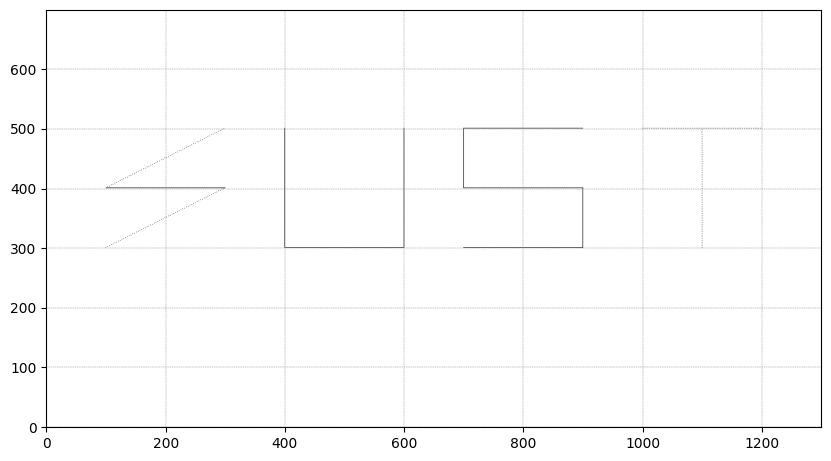

In [8]:
# Displaying "SUST" pattern
def display_drawings():
    # Initialize a canvas
    canvas_height, canvas_width = 700, 1300
    canvas = np.zeros((canvas_height, canvas_width), dtype=int)
    
    # Drawing "S"
    bresenham_line(canvas, 100, 400, 300, 400)
    bresenham_line_dashed(canvas, 100, 400, 300, 500)
    bresenham_line_dashed(canvas, 100, 300, 300, 400)
    
    # Drawing "U"
    bresenham_line(canvas, 400, 300, 600, 300)
    bresenham_line(canvas, 400, 300, 400, 500)
    bresenham_line(canvas, 600, 300, 600, 500)
    
    # Drawing "S" again
    bresenham_line(canvas, 700, 500, 900, 500)
    bresenham_line(canvas, 700, 400, 900, 400)
    bresenham_line(canvas, 700, 300, 900, 300)
    bresenham_line(canvas, 700, 400, 700, 500)
    bresenham_line(canvas, 900, 400, 900, 300)
    
    # Drawing "T"
    bresenham_line_dashed(canvas, 1000, 500, 1200, 500)
    bresenham_line_dashed(canvas, 1100, 300, 1100, 500)

    # Display the result with white background and grid
    plt.figure(figsize=(10, 10))
    plt.imshow(canvas, cmap="gray_r", origin="lower")  # Invert colormap to make background white
    plt.grid(visible=True, color="gray", linestyle="--", linewidth=0.3)  # Add grid lines
    plt.gca().set_facecolor("white")  # Set background to white
    plt.show()

# Run the display function
display_drawings()